In [1]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Excercise 1 -  Divergence problem

##### Variant A

In [3]:
model = CmdStanModel(stan_file='code_1.stan')

INFO:cmdstanpy:compiling stan file C:\Users\Agnieszka\Desktop\Sem 8\Data Analytics\DataA\Data-Analytics\Lab3\code_1.stan to exe file C:\Users\Agnieszka\Desktop\Sem 8\Data Analytics\DataA\Data-Analytics\Lab3\code_1.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Agnieszka\Desktop\Sem 8\Data Analytics\DataA\Data-Analytics\Lab3\code_1.exe


In [4]:
result = model.sample(data={'N':1, 'y':[1]}, 
                            seed = 9012022,
                            chains = 4)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▍         | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [5]:
print(result.diagnose())

Processing csv files: C:\Users\AGNIES~1\AppData\Local\Temp\tmpn2790mgx\code_1-20220321173520_1.csv, C:\Users\AGNIES~1\AppData\Local\Temp\tmpn2790mgx\code_1-20220321173520_2.csv, C:\Users\AGNIES~1\AppData\Local\Temp\tmpn2790mgx\code_1-20220321173520_3.csv, C:\Users\AGNIES~1\AppData\Local\Temp\tmpn2790mgx\code_1-20220321173520_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
2804 of 4000 (70.10%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete.



In [6]:
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    posterior=result
)
#Calculating log sigma
post = arviz_result.posterior
post["log_sigma"] = np.log(post["sigma"])
arviz_result

Inference data with groups:
	> posterior
	> sample_stats

<AxesSubplot:xlabel='mu', ylabel='log_sigma'>

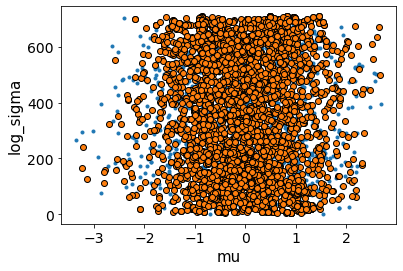

In [7]:
#Arviz plot
az.plot_pair(arviz_result, var_names=['mu', 'log_sigma'], divergences=True)

##### Variant B

In [9]:
model = CmdStanModel(stan_file='code_1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [10]:
result = model.sample(data={'N':5, 'y':[1.05, 0.87, -0.49, -0.22, 0.18]}, 
                            seed = 9012022,
                            chains = 4)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████▊   | 00:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)





chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [11]:
print(result.diagnose())

Processing csv files: C:\Users\AGNIES~1\AppData\Local\Temp\tmpn2790mgx\code_1-20220321173554_1.csv, C:\Users\AGNIES~1\AppData\Local\Temp\tmpn2790mgx\code_1-20220321173554_2.csv, C:\Users\AGNIES~1\AppData\Local\Temp\tmpn2790mgx\code_1-20220321173554_3.csv, C:\Users\AGNIES~1\AppData\Local\Temp\tmpn2790mgx\code_1-20220321173554_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.



In [12]:
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    posterior=result
)
#Calculating log sigma
post = arviz_result.posterior
post["log_sigma"] = np.log(post["sigma"])
arviz_result

Inference data with groups:
	> posterior
	> sample_stats

<AxesSubplot:xlabel='mu', ylabel='log_sigma'>

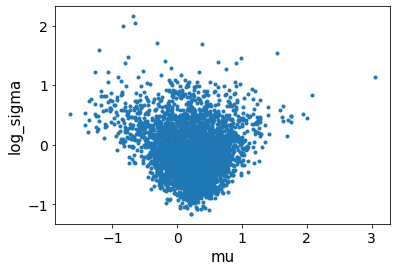

In [13]:
#Arviz plot
az.plot_pair(arviz_result, var_names=['mu', 'log_sigma'], divergences=True)

## Excercise 2 - Binominial example

In [14]:
df = pd.read_csv('coin.csv')
y = df['Toss_Result']
N = len(y)


In [18]:
model = CmdStanModel(stan_file='code_2.stan')
result = model.sample(data={"N" : N, "y" : y}, 
                            seed = 9012022,
                            chains = 4)

INFO:cmdstanpy:compiling stan file C:\Users\Agnieszka\Desktop\Sem 8\Data Analytics\DataA\Data-Analytics\Lab3\code_2.stan to exe file C:\Users\Agnieszka\Desktop\Sem 8\Data Analytics\DataA\Data-Analytics\Lab3\code_2.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Agnieszka\Desktop\Sem 8\Data Analytics\DataA\Data-Analytics\Lab3\code_2.exe
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/AGNIES~1/Desktop/SEM8~1/DATAAN~1/DataA/DATA-A~1/Lab3/code_2.hpp C:/Users/AGNIES~1/Desktop/SEM8~1/DATAAN~1/DataA/DATA-A~1/Lab3/code_2.stan
Warning in 'C:/Users/AGNIES~1/Desktop/SEM8~1/DATAAN~1/DataA/DATA-A~1/Lab3/code_2.stan', line 3, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -m64 -D_REENTRANT -Wall -Wno-unused-funct


INFO:cmdstanpy:CmdStan done processing.


In [19]:
result.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-290.00,0.01800,0.720,-290.00,-290.00,-290.0,1600.0,3000.0,1.0
theta,0.46,0.00066,0.025,0.42,0.46,0.5,1400.0,2600.0,1.0


In [20]:
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    posterior=result
)
arviz_result

Inference data with groups:
	> posterior
	> sample_stats

array([[<AxesSubplot:title={'center':'theta'}>]], dtype=object)

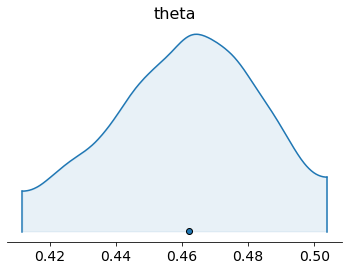

In [21]:
#Plot
az.plot_density(arviz_result,shade=0.1)

## Excercise 3 - Predictive checks


In [23]:
df = pd.read_csv('normal.csv')
y = df['value']
N = len(y)


#### Posterior predictive

In [24]:
model = CmdStanModel(stan_file='code_3.stan')


INFO:cmdstanpy:compiling stan file C:\Users\Agnieszka\Desktop\Sem 8\Data Analytics\DataA\Data-Analytics\Lab3\code_3.stan to exe file C:\Users\Agnieszka\Desktop\Sem 8\Data Analytics\DataA\Data-Analytics\Lab3\code_3.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Agnieszka\Desktop\Sem 8\Data Analytics\DataA\Data-Analytics\Lab3\code_3.exe


In [25]:
result = model.sample(data={'N':N, 'y':y}, 
                            seed = 9012022,
                            chains = 4)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▍         | 00:00 Status


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |████████▋ | 00:00 Iteration: 1600 / 2000 [ 80%]  (Sampling)
chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [26]:
result.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-53.0000,0.0250,1.100,-55.00,-53.0000,-52.00,1700.0,620.0,1.0
mu,-0.0350,0.0020,0.110,-0.21,-0.0340,0.14,2800.0,1000.0,1.0
sigma,1.0000,0.0013,0.073,0.91,1.0000,1.20,3100.0,1100.0,1.0
y_rep[1],-0.0290,0.0160,1.000,-1.70,-0.0360,1.70,4259.0,1518.0,1.0
y_rep[2],-0.0530,0.0160,1.000,-1.70,-0.0710,1.70,4170.0,1486.0,1.0
...,...,...,...,...,...,...,...,...,...
y_rep[96],-0.0330,0.0170,1.000,-1.70,-0.0340,1.60,3868.0,1378.0,1.0
y_rep[97],-0.0520,0.0170,1.000,-1.80,-0.0610,1.70,3928.0,1400.0,1.0
y_rep[98],-0.0080,0.0170,1.000,-1.70,-0.0180,1.70,3928.0,1400.0,1.0


In [27]:
#Convertion to arviz InferenceData

arviz_result = az.from_cmdstanpy(
    posterior=result,
    posterior_predictive=["y_rep"], 
    observed_data={"y": y},
)
arviz_result

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<AxesSubplot:xlabel='y / y_rep'>

C:\Users\Agnieszka\anaconda3\envs\data-anatylics\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


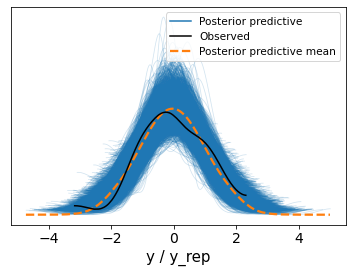

In [28]:
#Arviz plot
az.plot_ppc(arviz_result,data_pairs={"y": "y_rep"})

#### Prior predictive

In [31]:
model = CmdStanModel(stan_file='code_4.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [32]:
result = model.sample(data={'N':100}, 
                            chains = 1,
                            fixed_param=True,
                            seed = 523833
                            )

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [33]:
print(result.summary())
print(dir(result))

                Mean   MCSE  StdDev     5%     50%  95%   N_Eff  N_Eff/s  \
name                                                                       
lp__          0.0000    NaN     0.0  0.000  0.0000  0.0     NaN      NaN   
mu           -0.0220  0.031     1.0 -1.700 -0.0150  1.6  1100.0   6600.0   
sigma         0.7900  0.019     0.6  0.041  0.6700  1.9  1000.0   6300.0   
y_prior[1]   -0.0540  0.042     1.4 -2.300 -0.0740  2.3  1126.0   7085.0   
y_prior[2]    0.0360  0.045     1.4 -2.100 -0.0077  2.4  1003.0   6309.0   
...              ...    ...     ...    ...     ...  ...     ...      ...   
y_prior[96]  -0.0490  0.042     1.3 -2.200 -0.0060  2.0  1045.0   6571.0   
y_prior[97]   0.0027  0.050     1.4 -2.100  0.0300  2.2   770.0   4842.0   
y_prior[98]  -0.0190  0.041     1.4 -2.100 -0.0500  2.3  1178.0   7409.0   
y_prior[99]  -0.0450  0.044     1.4 -2.400  0.0110  2.4  1060.0   6667.0   
y_prior[100] -0.0370  0.043     1.4 -2.200 -0.0320  2.3  1051.0   6611.0   

           

In [35]:
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    prior=result,
    prior_predictive=["y_prior"],
    observed_data={"y": y}
)
arviz_result

Inference data with groups:
	> prior
	> prior_predictive
	> sample_stats_prior
	> observed_data

<AxesSubplot:xlabel='y / y_prior'>

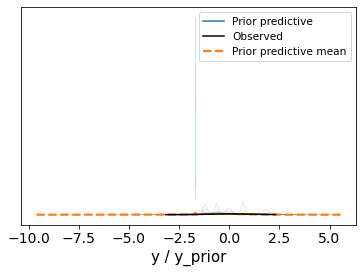

In [36]:
az.plot_ppc(arviz_result, group="prior", data_pairs={"y": "y_prior"}, num_pp_samples=30)

<AxesSubplot:>

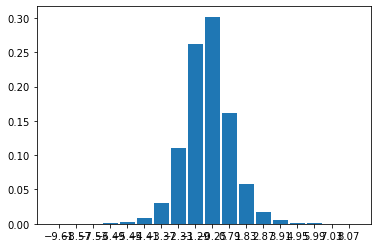

In [37]:
#Draw y_prior histogram
az.plot_dist(values = result.stan_variable('y_prior'), kind = 'hist')